In [1]:
#Importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential   #used as linear stack of layers used for building deep learning models.
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout   #different layers for convolutional, pooling, fully connected, regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #used for real-time data augmentation during model training.
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dir = r"C:\Users\dell\3RI\PC-Parts_Dataset\pc_parts"  #Importing dataset

In [3]:
len(train_dir)  #Calculating length

43

In [4]:
train_generator = ImageDataGenerator(
    rescale = 1.0/255,   # Rescale pixel values to the range [0,1]
    rotation_range = 20, # Randomly rotate images by 20 degrees
    width_shift_range = 0.2,   # Randomly shift images vertically by 20% of the width
    height_shift_range = 0.2,   # Randomly shift images vertically by 20% of the height
    horizontal_flip = True,   # Randomly flip images horizontally
    shear_range = 0.2,   #Shear intensity (shear angle in radians)
    zoom_range = 0.2,   # Randomly zoom images by 20%
    validation_split = 0.2    #use of 20% of the data for validation
)

In [5]:
width, height = 256, 256
batch_size = 32

In [6]:
X_train = train_generator.flow_from_directory(
    train_dir,   # Directory containing the training images
    target_size = (width, height),  # Size to resize the images to
    batch_size = batch_size,   # Number of images per batch
    class_mode = 'categorical',   # Mode for classifying labels (categorical for multi-class)
    subset = 'training'  # Subset of data to use ('training' for training set)
)

Found 2629 images belonging to 14 classes.


In [7]:
X_test = train_generator.flow_from_directory(
    train_dir,
    target_size = (width, height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 650 images belonging to 14 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape = (width, height, 3)),  # 32 filters, each 3x3, ReLU activation
    MaxPool2D((2, 2)),  # Max pooling with 2x2 pool size
    Conv2D(64, (3,3), activation="relu"),  # 64 filters, each 3x3, ReLU activation
    MaxPool2D((2, 2)),
    Conv2D(128, (3,3), activation="relu"), # 128 filters, each 3x3, ReLU activation
    MaxPool2D((2, 2)),
    Conv2D(128, (3,3), activation="relu"), # 128 filters, each 3x3, ReLU activation
    MaxPool2D((2, 2)),
    Flatten(),   # Flatten the output to feed to Dense layers
    Dense(256, activation="relu"),   # Fully connected layer with 256 neurons, ReLU activation
    Dense(128, activation="relu"),   # Fully connected layer with 128 neurons, ReLU activation
    Dense(14, activation="softmax")  # Output layer with 14 neurons for classification, softmax activation
])

In [9]:
#from tensorflow.keras.optimizers import Adam

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
# Optimizer to use for training (Adam optimizer), Loss function to minimize (categorical crossentropy), Metrics to monitor during training (accuracy)

In [11]:
history = model.fit(X_train, epochs=50, batch_size=batch_size, validation_data=X_test)   # Number of epochs (iterations over the entire training dataset

Epoch 1/50


83/83 [==============================] - 97s 1s/step - loss: 2.6275 - accuracy: 0.0894 - val_loss: 2.6271 - val_accuracy: 0.0892
Epoch 2/50
83/83 [==============================] - 93s 1s/step - loss: 2.6145 - accuracy: 0.1023 - val_loss: 2.5798 - val_accuracy: 0.0831
Epoch 3/50
83/83 [==============================] - 105s 1s/step - loss: 2.5353 - accuracy: 0.1320 - val_loss: 2.6399 - val_accuracy: 0.1246
Epoch 4/50
83/83 [==============================] - 94s 1s/step - loss: 2.4555 - accuracy: 0.1560 - val_loss: 2.3673 - val_accuracy: 0.1831
Epoch 5/50
83/83 [==============================] - 91s 1s/step - loss: 2.3885 - accuracy: 0.1959 - val_loss: 2.3124 - val_accuracy: 0.2246
Epoch 6/50
83/83 [==============================] - 95s 1s/step - loss: 2.2759 - accuracy: 0.2309 - val_loss: 2.3226 - val_accuracy: 0.2431
Epoch 7/50
83/83 [==============================] - 98s 1s/step - loss: 2.1956 - accuracy: 0.2689 - val_loss: 2.3009 - val_accuracy: 0.2431
Epoch 8/50
83/83 

In [12]:
import matplotlib.pyplot as plt

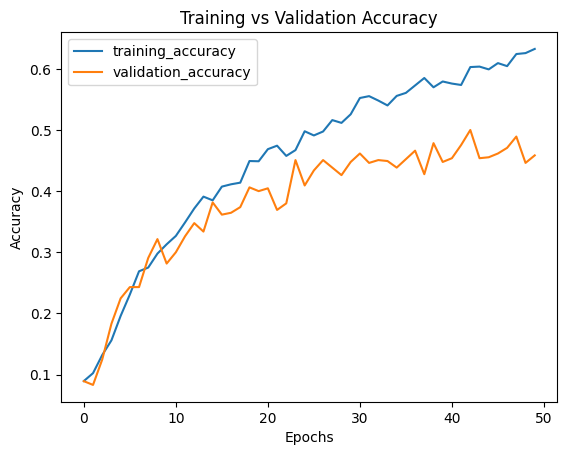

In [13]:
#Data visualization for accuracy
plt.plot(history.history["accuracy"], label="training_accuracy")
plt.plot(history.history["val_accuracy"], label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

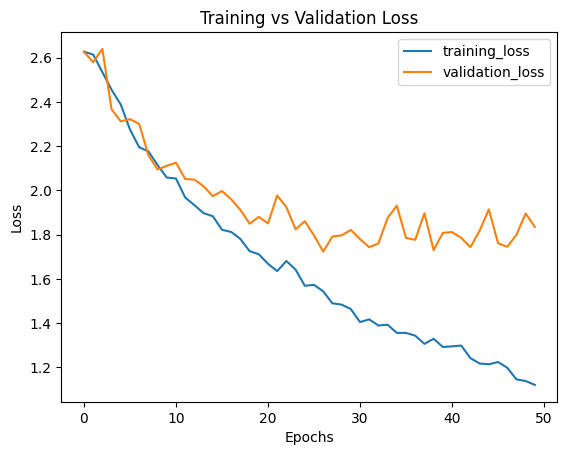

In [23]:
#Data visualization for loss
plt.plot(history.history["loss"], label="training_loss")
plt.plot(history.history["val_loss"], label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

In [80]:
#Obtaining the class indices from test generator and mapping numeric class indices to class names
class_names = X_test.class_indices
classes = {value:key for key, value in class_names.items()}
print("PC_parts class names are:-", classes)

PC_parts class names are:- {0: 'cables', 1: 'case', 2: 'cpu', 3: 'gpu', 4: 'hdd', 5: 'headset', 6: 'keyboard', 7: 'microphone', 8: 'monitor', 9: 'motherboard', 10: 'mouse', 11: 'ram', 12: 'speakers', 13: 'webcam'}


In [92]:
from tensorflow.keras.preprocessing import image  # provides utilities for working with images, such as loading, preprocessing, and augmenting images.

In [93]:
path = r"C:\Users\dell\3RI\PC-Parts_Dataset\pc_parts\motherboard\12.jpg"  #Importing image path for image prediction

In [94]:
#Loading and normalizing the image
Image = image.load_img(path, target_size=(width, height))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr/255

In [95]:
predict = model.predict(image_arr)  #prediction

1/1 [==============================] - 0s 53ms/step


In [96]:
predicted_class = np.argmax(predict)
predicted_class

9

In [97]:
print("The predicted class of the PC_parts image is:-", classes[predicted_class])  #Printing the class

The predicted class of the PC_parts image is:- motherboard


In [108]:
path1 = r"C:\Users\dell\3RI\PC-Parts_Dataset\pc_parts\webcam\1.jpg"

In [109]:
Image = image.load_img(path1, target_size=(width, height))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr/255

In [110]:
predict1 = model.predict(image_arr)

1/1 [==============================] - 0s 49ms/step


In [111]:
predicted_class = np.argmax(predict1)
predicted_class

13

In [112]:
print("The predicted class of the PC_parts image is:-", classes[predicted_class])

The predicted class of the PC_parts image is:- webcam


In [113]:
path2 = r"C:\Users\dell\3RI\PC-Parts_Dataset\pc_parts\monitor\8.jpg"

In [114]:
Image = image.load_img(path2, target_size=(width, height))
image_arr = image.img_to_array(Image)
image_arr = np.expand_dims(image_arr, axis=0)
image_arr = image_arr/255

In [116]:
predict2 = model.predict(image_arr)

1/1 [==============================] - 0s 44ms/step


In [117]:
predicted_class = np.argmax(predict2)
predicted_class

8

In [118]:
print("The predicted class of the PC_parts image is:-", classes[predicted_class])

The predicted class of the PC_parts image is:- monitor


Model Summary:

Hence, We have visualized, predicted the PC parts images classification using
Convolutional Neural Network using ReLu and softmax activation for output